In [2]:
import pandas as pd

def process(file):
    df = pd.read_csv(file)
    df.insert(0, '序号', range(len(df)))
    df.to_csv(file, index=False)
    
if __name__ == '__main__':
    files = ['/home/tiantianyi/code/public-sentiment-analysis/data/processed/train.csv', '/home/tiantianyi/code/public-sentiment-analysis/data/processed/test.csv']
    for file in files:
        process(file)
        print(f'{file} processed.')

/home/tiantianyi/code/public-sentiment-analysis/data/processed/train.csv processed.
/home/tiantianyi/code/public-sentiment-analysis/data/processed/test.csv processed.


In [5]:
import pandas as pd

# 读取原始数据
input_file = "/home/tiantianyi/code/public-sentiment-analysis/data/processed/train.csv"
df = pd.read_csv(input_file)

# 拼接 text 和 target
df['text'] = df['text'] + " [SEP] target: " + df['target']

# 保存到新的 CSV 文件
output_file = "/home/tiantianyi/code/public-sentiment-analysis/data/test/train.csv"
df.to_csv(output_file, index=False)

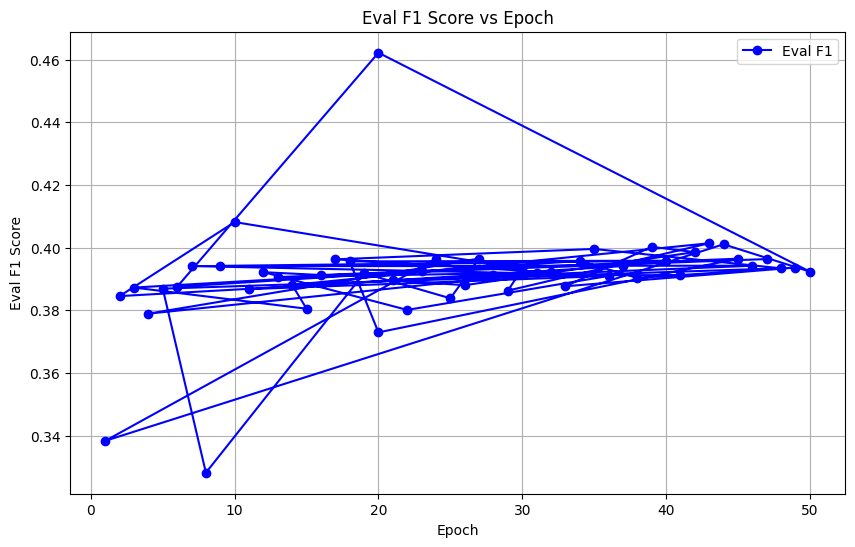

In [9]:
%matplotlib inline
import os
import json
import matplotlib.pyplot as plt

def plot_eval_f1_vs_epoch(base_dir: str):
    epochs = []
    eval_f1_scores = []

    # 遍历 base_dir 下的所有子目录
    for subdir in [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]:
        trainer_state_path = os.path.join(subdir, "trainer_state.json")
        
        # 检查 trainer_state.json 是否存在
        if not os.path.exists(trainer_state_path):
            print(f"文件 {trainer_state_path} 不存在，跳过。")
            continue

        try:
            # 读取 trainer_state.json 文件
            with open(trainer_state_path, "r", encoding="utf-8") as f:
                trainer_state = json.load(f)
            
            # 提取 log_history 列表的最后一个元素
            log_history = trainer_state.get("log_history", [])
            if not log_history:
                print(f"文件 {trainer_state_path} 的 log_history 为空，跳过。")
                continue
            
            last_log = log_history[-1]  # 获取最后一个元素
            eval_f1 = last_log.get("eval_f1")
            epoch = last_log.get("epoch")

            # 确保 eval_f1 和 epoch 存在
            if eval_f1 is not None and epoch is not None:
                eval_f1_scores.append(eval_f1)
                epochs.append(epoch)
        except (json.JSONDecodeError, KeyError) as e:
            print(f"解析 {trainer_state_path} 时出错: {e}")
            continue

    # 绘制折线图
    if epochs and eval_f1_scores:
        plt.figure(figsize=(10, 6))
        plt.plot(epochs, eval_f1_scores, marker="o", linestyle="-", color="b", label="Eval F1")
        plt.xlabel("Epoch")
        plt.ylabel("Eval F1 Score")
        plt.title("Eval F1 Score vs Epoch")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("没有足够的数据绘制图表。")

plot_eval_f1_vs_epoch("/home/tiantianyi/code/public-sentiment-analysis/models/output")

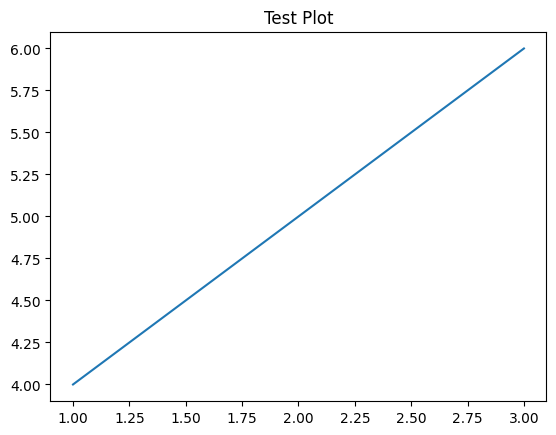

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot")
plt.show()

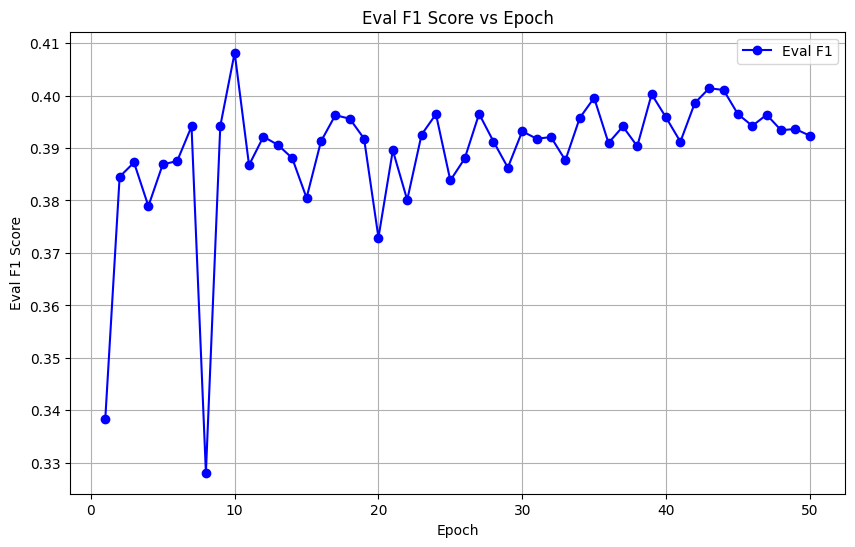

In [16]:
import json
import matplotlib.pyplot as plt

def plot_eval_f1_vs_epoch(train_state: str):
    with open(train_state, "r") as f:
        data = json.load(f)

    log_history = data.get("log_history", [])
    if not log_history:
        print("log_history 为空。")
        return
    
    epochs, eval_f1 = zip(*map(lambda x: (x["epoch"], x["eval_f1"]), filter(lambda x: "eval_f1" in x, log_history)))

    if epochs and eval_f1:
        plt.figure(figsize=(10, 6))
        plt.plot(epochs, eval_f1, marker="o", linestyle="-", color="b", label="Eval F1")
        plt.xlabel("Epoch")
        plt.ylabel("Eval F1 Score")
        plt.title("Eval F1 Score vs Epoch")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("没有足够的数据绘制图表。")

plot_eval_f1_vs_epoch("/home/tiantianyi/code/public-sentiment-analysis/models/output/checkpoint-5300/trainer_state.json")

In [ ]:
DATASET_INCREASE_ROUND = 10
for i in range(DATASET_INCREASE_ROUND
               ):
    data_ratio = [i * 1 / DATASET_INCREASE_ROUND, (i + 1) * 1 / DATASET_INCREASE_ROUND]
    print(data_ratio)